In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

1) Load the dataset and display a scatter plot with all the data instances. Column 1 needs to be plotted on the X-axis and Column 2 on the Y-axis. Color code the points based on their class label. That is, instances of the same class should be displayed with the same color. Another color needs to be used for instances of the second class. This plot will show you the distribution of the two classes.

Text(0.5, 1.0, 'Feature1 vs Feature2 for two class labels')

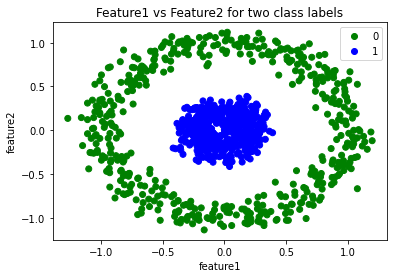

In [2]:
dataset = pd.read_csv("data.csv")
dataset.columns = ['feature1','feature2','class label']

classes = [0, 1]
scatter = plt.scatter(x=dataset['feature1'],y=dataset['feature2'],c=dataset['class label'],cmap=ListedColormap(['g','b']))
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("Feature1 vs Feature2 for two class labels")


Split the dataset into training and testing (70-30 split). To do this, when you call the train_test_split function make sure you specify the random_state parameter like this, random_state=0. This is to ensure that we all get the same train and test splits.

In [3]:
X = dataset.iloc[:,0:2]
y = dataset.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

2) Normalize the data using standardization. Fit a logistic regression model. What is the model accuracy on the test set?

In [4]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model Accuracy
print(classifierObj.score(X_test,y_test))

0.5233333333333333


Accuracy for simple logistic regression is 52.33%.

3) Perform PCA on the dataset and retain 2 principal components. Visualize the 2-dimensional training data with a scatter plot like before. (Same color for class labels as above).

Text(0.5, 1.0, 'PC1 vs PC2 for two class labels')

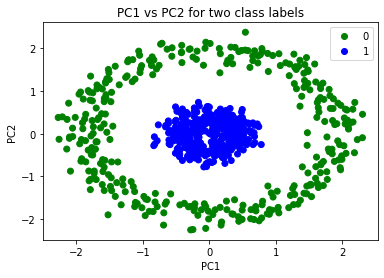

In [5]:
#Performing PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=2)
X_train_pc1 = pcaObj.fit_transform(X_train)
X_test_pc1 = pcaObj.transform(X_test)

#Visualizing two principal components
classes = [0, 1]
scatter = plt.scatter(x=X_train_pc1[:,0],y=X_train_pc1[:,1],c=y_train,cmap=ListedColormap(['g','b']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PC1 vs PC2 for two class labels")

4) Fit a logistic regression model on this dataset. What is the model accuracy on the test set?

In [6]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train_pc1, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test_pc1)

#Model Accuracy
print(classifierObj.score(X_test_pc1,y_test))

0.5233333333333333


The accurracy remains same as 52.33%

5) Now perform PCA and retain only one principal component and visualize the training data like before. This time your plot should be a horizontal line since you have just one dimension.

Text(0.5, 1.0, 'PC1 visualization for two class labels')

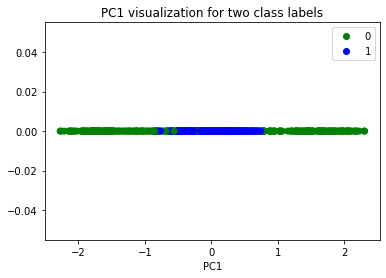

In [7]:
#Performing PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=1)
X_train_pc2 = pcaObj.fit_transform(X_train)
X_test_pc2 = pcaObj.transform(X_test)

val=0
classes = [0, 1]
scatter = plt.scatter(x=X_train_pc2[:,0],y=np.zeros_like(X_train_pc2[:,0]) + val,c=y_train,cmap=ListedColormap(['g','b']))
plt.xlabel("PC1")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PC1 visualization for two class labels")

6) Fit a logistic regression model on this dataset. What is the model accuracy on the test set?

In [8]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train_pc2,y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test_pc2)

#Model Accuracy
print(classifierObj.score(X_test_pc2,y_test))

0.5166666666666667


The accuracy with principal component is 51.66%

7) Perform LDA. Your dataset should have just one dimension. Visualize this training data like before.

Text(0.5, 1.0, 'LD1 visualization for two class labels')

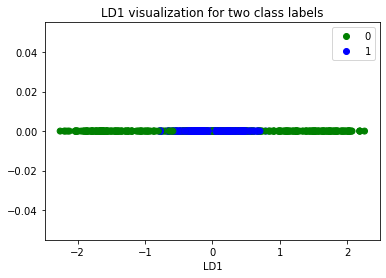

In [9]:
#Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldaObj = LinearDiscriminantAnalysis()
X_train_ld = ldaObj.fit_transform(X_train,y_train)
X_test_ld = ldaObj.transform(X_test)

#Visualizing two LDA components
val=0
classes = [0,1]
scatter = plt.scatter(x=X_train_ld[:,0],y=np.zeros_like(X_train_ld[:,0]) + val,c=y_train,cmap=ListedColormap(['g','b']))
plt.xlabel("LD1")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("LD1 visualization for two class labels")

8) Fit a logistic regression model on this dataset. What is the model accuracy on the test set?

In [10]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train_ld,y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test_ld)

#Model Accuracy
print(classifierObj.score(X_test_ld,y_test))

0.5233333333333333


The model accuracy with LDA is 52.33%

9) Perform Kernel PCA and retain two components. Visualize this training data like before.

Text(0.5, 1.0, 'LD1 vs LD2 for two class labels')

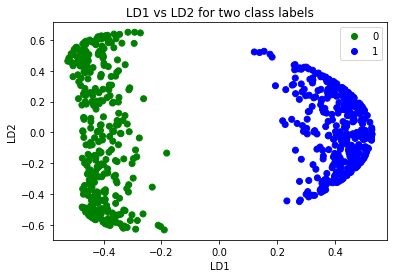

In [11]:
#kernel PCA
from sklearn.decomposition import KernelPCA
kernelPCAObj = KernelPCA(n_components=2, kernel='rbf')
X_train_kpca = kernelPCAObj.fit_transform(X_train)
X_test_kpca = kernelPCAObj.transform(X_test)

#Visualizing two kpca components
classes = [0, 1]
scatter = plt.scatter(x=X_train_kpca[:,0],y=X_train_kpca[:,1],c=y_train,cmap=ListedColormap(['g','b']))
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("LD1 vs LD2 for two class labels")

10) Fit a logistic regression model on this dataset. What is the model accuracy on the test set?

In [12]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train_kpca,y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test_kpca)

#Model Accuracy
print(classifierObj.score(X_test_kpca,y_test))

1.0


The model accuracy is 100%.